In [1]:
import pandas as pd

### 1. Load Cleaned Data

In [2]:
df = pd.read_csv("../data/processed/diabetes_cleaned.csv")

In [3]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0


### 2. Split Features and Target

##### Define X (features) and y (target label)

In [4]:
X = df.drop("diabetic", axis=1)
y = df["diabetic"]

#### 3. Feature Scaling (Standardization)
##### Apply StandardScaler to scale numeric features

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4. Feature Selection
#### Use one or more of the following:

#### SelectKBest

#### RFE (Recursive Feature Elimination)

#### RFECV (with cross-validation)

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=6)
X_selected = selector.fit_transform(X_scaled, y)


#### 5. Train-Test Split
##### Split the dataset into training and testing sets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


#### 6. Handle Class Imbalance (SMOTE)
##### Apply SMOTE to balance the classes

In [8]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


#### 7. Train Models

##### Train and evaluate multiple models:

##### Logistic Regression

##### Random Forest

##### XGBoost

#### 1. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

print(" Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))


 Logistic Regression Results
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        92
           1       0.44      0.53      0.48        36

    accuracy                           0.68       128
   macro avg       0.62      0.63      0.62       128
weighted avg       0.70      0.68      0.69       128



#### 2. Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(" Random Forest Results")
print(classification_report(y_test, y_pred_rf))


 Random Forest Results
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        92
           1       0.56      0.64      0.60        36

    accuracy                           0.76       128
   macro avg       0.71      0.72      0.71       128
weighted avg       0.77      0.76      0.76       128



#### 3. XGBoost

In [32]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("⚡ XGBoost Results")
print(classification_report(y_test, y_pred_xgb))


⚡ XGBoost Results
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        92
           1       0.50      0.67      0.57        36

    accuracy                           0.72       128
   macro avg       0.68      0.70      0.68       128
weighted avg       0.75      0.72      0.73       128



/usr/local/anaconda3/envs/MSC/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:41:02] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_7eg2b3w9sf/croot/xgboost-split_1749630922962/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Compare All Models Visually

#### Visualize Model Comparison with Bar Charts

In [33]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# AUC values
auc_lr = auc(*roc_curve(y_test, y_proba_lr)[:2])
auc_rf = auc(*roc_curve(y_test, y_proba_rf)[:2])
auc_xgb = auc(*roc_curve(y_test, y_proba_xgb)[:2])

# Data for plotting
metrics_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb),
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb),
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb),
    ],
    "ROC AUC": [auc_lr, auc_rf, auc_xgb]
})

metrics_df.set_index("Model", inplace=True)


/var/folders/xb/pyk74hnn56sf6xk3d2grf0_h0000gp/T/ipykernel_47179/1931811568.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/anaconda3/envs/MSC/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


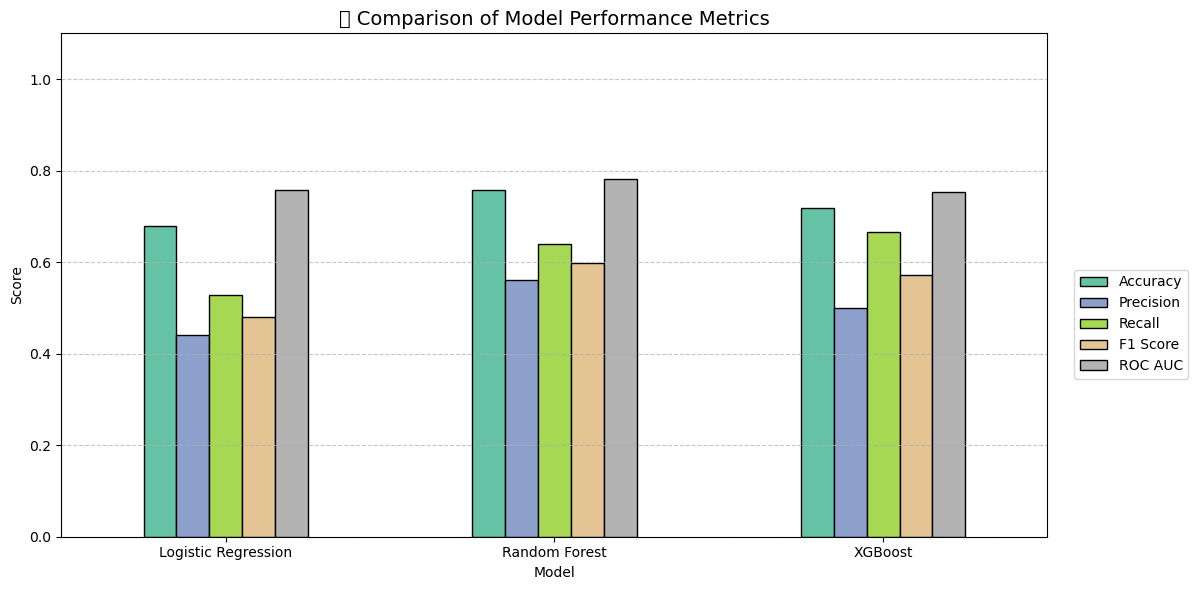

In [34]:
import matplotlib.pyplot as plt

# Plot settings
metrics_df.plot(kind="bar", figsize=(12, 6), colormap="Set2", edgecolor="black")

plt.title("📊 Comparison of Model Performance Metrics", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.legend(loc="lower right", bbox_to_anchor=(1.15, 0.3))
plt.tight_layout()
plt.show()
